In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('consommation-electrique-par-secteur-dactivite-commune.csv', sep=';')

In [17]:
df1 = df.drop( ["Nom EPCI","Code EPCI","Type EPCI","Geo Shape","Geo Point 2D"] , axis = 1 )

In [18]:
df1 = df1.sort_values(by = ['Code région','Année'])

In [19]:
dfP = df1.groupby(['Année','Nom région']).agg({'Conso totale Professionnel (MWh)':'sum'})
dfA = df1.groupby(['Année','Nom région']).agg({'Conso totale Agriculture (MWh)':'sum'})
dfI = df1.groupby(['Année','Nom région']).agg({'Conso totale Industrie (MWh)':'sum'})
dfT = df1.groupby(['Année','Nom région']).agg({'Conso totale Tertiaire (MWh)':'sum'})
dfNa = df1.groupby(['Année','Nom région']).agg({'Conso totale Secteur non affecté (MWh)':'sum'})
dfR = df1.groupby(['Année','Nom région']).agg({'Conso totale Résidentiel (MWh)':'sum'})

df2 = pd.concat([dfP, dfA, dfI, dfT, dfNa, dfR], axis=1)

In [20]:
df2['Amount of non-resident consumption'] = df2['Conso totale Professionnel (MWh)'] + df2['Conso totale Agriculture (MWh)'] + df2['Conso totale Industrie (MWh)'] + df2['Conso totale Tertiaire (MWh)'] + df2['Conso totale Secteur non affecté (MWh)']
df2['Total'] = df2['Conso totale Professionnel (MWh)'] + df2['Conso totale Agriculture (MWh)'] + df2['Conso totale Industrie (MWh)'] + df2['Conso totale Tertiaire (MWh)'] + df2['Conso totale Secteur non affecté (MWh)'] + df2['Conso totale Résidentiel (MWh)']
df2

Conso totale Professionnel (MWh)  \
Année Nom région                                                     
2011  Auvergne-Rhône-Alpes                            4.654541e+06   
      Bourgogne-Franche-Comté                         1.582883e+06   
      Bretagne                                        2.185178e+06   
      Centre-Val de Loire                             1.420951e+06   
      Grand-Est                                       2.046257e+06   
      Hauts-de-France                                 2.640327e+06   
      Normandie                                       1.829273e+06   
      Nouvelle Aquitaine                              3.595817e+06   
      Occitanie                                       3.492922e+06   
      Pays de la Loire                                2.229682e+06   
      Provence-Alpes-Côte d'Azur                      3.097129e+06   
      Île-de-France                                   6.319255e+06   
2012  Auvergne-Rhône-Alpes                            4.698072e+06   
      Bourgogne-Franche-Comté                         1.513012e+06   
      Bretagne                                        2.228447e+06   
      Centre-Val de Loire                             1.441245e+06   
      Grand-Est                                       2.090122e+06   
      Hauts-de-France                                 2.635713e+06   
      Normandie                                       1.842402e+06   
      Nouvelle Aquitaine                              3.672277e+06   
      Occitanie                                       3.541428e+06   
      Pays de la Loire                                2.257026e+06   
      Provence-Alpes-Côte d'Azur                      3.100963e+06   
      Île-de-France                                   6.301389e+06   
2013  Auvergne-Rhône-Alpes                            4.668411e+06   
      Bourgogne-Franche-Comté                         1.484539e+06   
      Bretagne                                        2.357895e+06   
      Centre-Val de Loire                             1.449507e+06   
      Grand-Est                                       2.125568e+06   
      Hauts-de-France                                 2.604538e+06   
...                                                            ...   
2014  Normandie                                       1.718047e+06   
      Nouvelle Aquitaine                              3.318302e+06   
      Occitanie                                       3.140477e+06   
      Pays de la Loire                                2.062230e+06   
      Provence-Alpes-Côte d'Azur                      2.685888e+06   
      Île-de-France                                   5.344491e+06   
2015  Auvergne-Rhône-Alpes                            4.219387e+06   
      Bourgogne-Franche-Comté                         1.314056e+06   
      Bretagne                                        1.914524e+06   
      Centre-Val de Loire                             1.294533e+06   
      Grand-Est                                       1.834716e+06   
      Hauts-de-France                                 2.155941e+06   
      Normandie                                       1.665032e+06   
      Nouvelle Aquitaine                              3.410366e+06   
      Occitanie                                       3.066334e+06   
      Pays de la Loire                                2.074778e+06   
      Provence-Alpes-Côte d'Azur                      2.808443e+06   
      Île-de-France                                   5.025373e+06   
2016  Auvergne-Rhône-Alpes                            3.293859e+06   
      Bourgogne-Franche-Comté                         1.277748e+06   
      Bretagne                                        1.685536e+06   
      Centre-Val de Loire                             1.001539e+06   
      Grand-Est                                       1.580256e+06   
      Hauts-de-France                                 1.609612e+06   
      Normandie                             

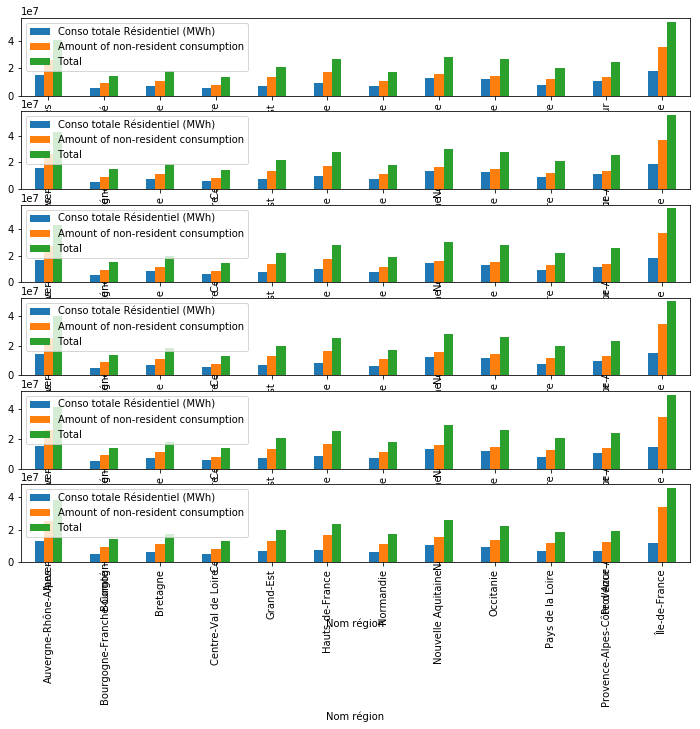

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

df3 = df2.drop( ["Conso totale Professionnel (MWh)","Conso totale Agriculture (MWh)","Conso totale Industrie (MWh)","Conso totale Tertiaire (MWh)","Conso totale Secteur non affecté (MWh)"] , axis = 1 )

f, a = plt.subplots(6,1, figsize = (12, 10) )

df3.xs(2011).plot( kind = 'bar' , ax = a[0] )
df3.xs(2012).plot( kind = 'bar', ax = a[1] )
df3.xs(2013).plot( kind = 'bar' , ax = a[2] )
df3.xs(2014).plot( kind = 'bar' , ax = a[3] )
df3.xs(2015).plot( kind = 'bar' , ax = a[4] )
df3.xs(2016).plot( kind = 'bar' , ax = a[5] )

In [24]:
df3 = df3.groupby(['Nom région']).agg({'Total':'sum'})
df3 = df3.sort_values(by = ['Total'])
df3

,Total
Nom région,
Centre-Val de Loire,8.210297e+07
Bourgogne-Franche-Comté,8.579130e+07
Normandie,1.071415e+08
Bretagne,1.099142e+08
Pays de la Loire,1.219570e+08
Grand-Est,1.243279e+08
Provence-Alpes-Côte d'Azur,1.413052e+08
Hauts-de-France,1.563007e+08
Occitanie,1.574518e+08


In [25]:
df4 = df.groupby(['Nom région','Année']).agg({'Conso moyenne Résidentiel (MWh)' : 'sum'})

In [26]:
df4

Conso moyenne Résidentiel (MWh)
Nom région                 Année                                 
Auvergne-Rhône-Alpes       2011                      20937.331287
                           2012                      22274.207360
                           2013                      22960.722117
                           2014                      20588.980758
                           2015                      21122.746021
                           2016                      21116.325878
Bourgogne-Franche-Comté    2011                      16113.701085
                           2012                      17269.965645
                           2013                      17617.702285
                           2014                      15698.114729
                           2015                      16146.414424
                           2016                      16560.138015
Bretagne                   2011                       6909.010766
                           2012                       7451.684215
                           2013                       7659.275803
                           2014                       6785.323111
                           2015                       6884.115257
                           2016                       6794.832683
Centre-Val de Loire        2011                      10032.412381
                           2012                      10774.268007
                           2013                      11128.274146
                           2014                       9795.289737
                           2015                      10137.558485
                           2016                      10394.352455
Grand-Est                  2011                      21810.185597
                           2012                      23353.325992
                           2013                      23693.266202
                           2014                      21065.680249
                           2015                      21800.566127
                           2016                      22379.334663
...                                                           ...
Nouvelle Aquitaine         2011                      20852.062805
                           2012                      22447.887408
                           2013                      23047.093312
                           2014                      20889.026509
                           2015                      21423.859066
                           2016                      21501.658350
Occitanie                  2011                      20302.592091
                           2012                      21635.539945
                           2013                      22194.366051
                           2014                      20057.186937
                           2015                      20361.087731
                           2016                      20328.632582
Pays de la Loire           2011                       9220.612478
                           2012                       9925.343432
                           2013                      10215.430566
                           2014                       8988.267809
                           2015                       9181.717370
                           2016                       8370.147940
Provence-Alpes-Côte d'Azur 2011                       4893.159424
                           2012                       5100.561315
                           2013                       5161.530128
                           2014                       4590.059568
                           2015                       4517.209513
                           2016                       4418.713182
Île-de-France              2011                       7208.770065
                           2012                       7670.792525
                           2013                       7747.246003
                           2014                       6746.747314
        

In [27]:
df5 = df4.drop(["Bretagne", 'Bourgogne-Franche-Comté', 'Centre-Val de Loire','Grand-Est','Hauts-de-France','Normandie','Nouvelle Aquitaine','Occitanie','Pays de la Loire',"Provence-Alpes-Côte d'Azur",'Île-de-France'])
df6 = df4.drop(["Bretagne", 'Auvergne-Rhône-Alpes', 'Centre-Val de Loire','Grand-Est','Hauts-de-France','Normandie','Nouvelle Aquitaine','Occitanie','Pays de la Loire',"Provence-Alpes-Côte d'Azur",'Île-de-France'])
df7= df4.drop(["Bretagne", 'Bourgogne-Franche-Comté', 'Auvergne-Rhône-Alpes','Grand-Est','Hauts-de-France','Normandie','Nouvelle Aquitaine','Occitanie','Pays de la Loire',"Provence-Alpes-Côte d'Azur",'Île-de-France'])
df8 = df4.drop(["Bretagne", 'Bourgogne-Franche-Comté', 'Centre-Val de Loire','Auvergne-Rhône-Alpes','Hauts-de-France','Normandie','Nouvelle Aquitaine','Occitanie','Pays de la Loire',"Provence-Alpes-Côte d'Azur",'Île-de-France'])
df9= df4.drop(["Bretagne", 'Bourgogne-Franche-Comté', 'Centre-Val de Loire','Grand-Est','Auvergne-Rhône-Alpes','Normandie','Nouvelle Aquitaine','Occitanie','Pays de la Loire',"Provence-Alpes-Côte d'Azur",'Île-de-France'])
df10 = df4.drop(["Bretagne", 'Bourgogne-Franche-Comté', 'Centre-Val de Loire','Grand-Est','Hauts-de-France','Auvergne-Rhône-Alpes','Nouvelle Aquitaine','Occitanie','Pays de la Loire',"Provence-Alpes-Côte d'Azur",'Île-de-France'])
df11= df4.drop(["Bretagne", 'Bourgogne-Franche-Comté', 'Centre-Val de Loire','Grand-Est','Hauts-de-France','Normandie','Auvergne-Rhône-Alpes','Occitanie','Pays de la Loire',"Provence-Alpes-Côte d'Azur",'Île-de-France'])
df12= df4.drop(["Bretagne", 'Bourgogne-Franche-Comté', 'Centre-Val de Loire','Grand-Est','Hauts-de-France','Normandie','Nouvelle Aquitaine','Auvergne-Rhône-Alpes','Pays de la Loire',"Provence-Alpes-Côte d'Azur",'Île-de-France'])
df13= df4.drop(["Bretagne", 'Bourgogne-Franche-Comté', 'Centre-Val de Loire','Grand-Est','Hauts-de-France','Normandie','Nouvelle Aquitaine','Occitanie','Auvergne-Rhône-Alpes',"Provence-Alpes-Côte d'Azur",'Île-de-France'])
df14 = df4.drop(["Bretagne", 'Bourgogne-Franche-Comté', 'Centre-Val de Loire','Grand-Est','Hauts-de-France','Normandie','Nouvelle Aquitaine','Occitanie','Pays de la Loire',"Auvergne-Rhône-Alpes",'Île-de-France'])
df15 = df4.drop(["Bretagne", 'Bourgogne-Franche-Comté', 'Centre-Val de Loire','Grand-Est','Hauts-de-France','Normandie','Nouvelle Aquitaine','Occitanie','Pays de la Loire',"Provence-Alpes-Côte d'Azur",'Auvergne-Rhône-Alpes'])
df16 = df4.drop(["Auvergne-Rhône-Alpes", 'Bourgogne-Franche-Comté', 'Centre-Val de Loire','Grand-Est','Hauts-de-France','Normandie','Nouvelle Aquitaine','Occitanie','Pays de la Loire',"Provence-Alpes-Côte d'Azur",'Île-de-France'])


Conso moyenne Résidentiel (MWh)
Nom région Année                                 
Bretagne   2011                       6909.010766
           2012                      14360.694981
           2013                      22019.970784
           2014                      28805.293895
           2015                      35689.409152
           2016                      42484.241835

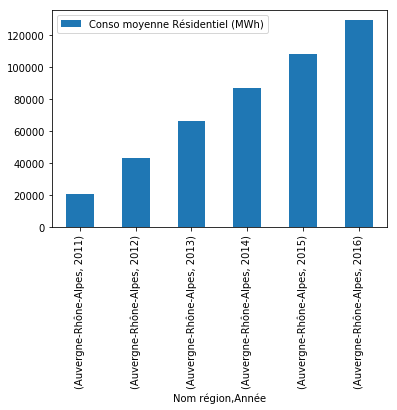

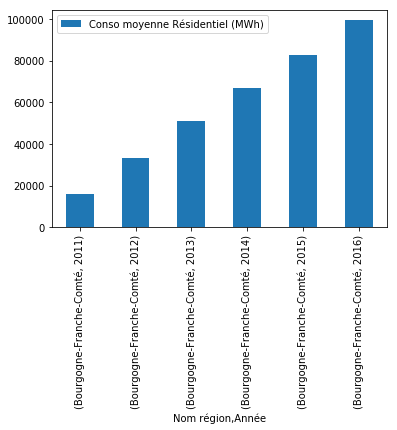

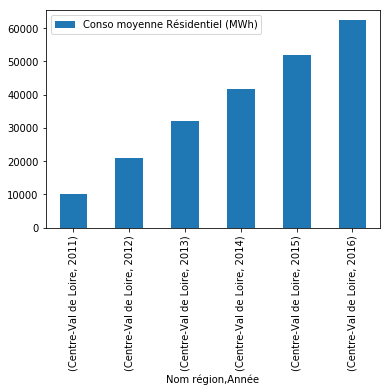

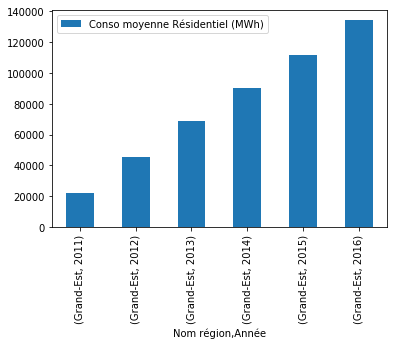

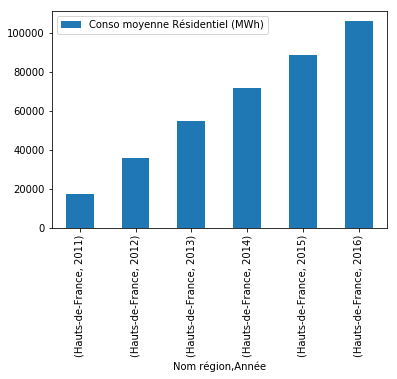

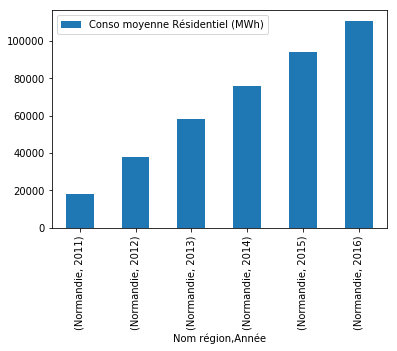

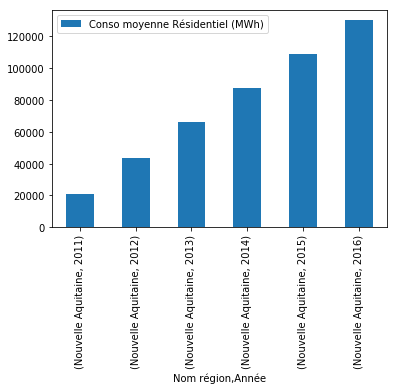

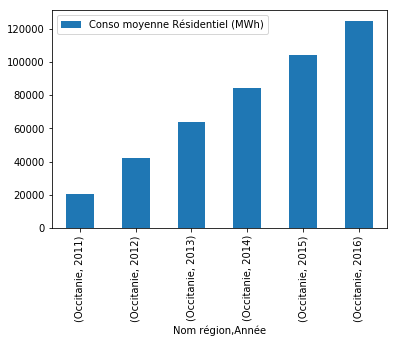

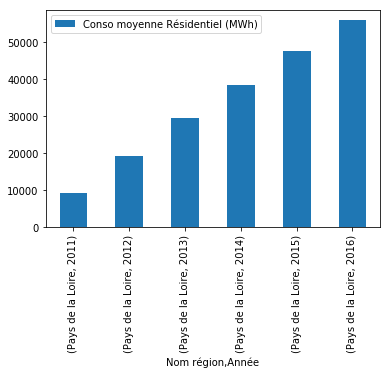

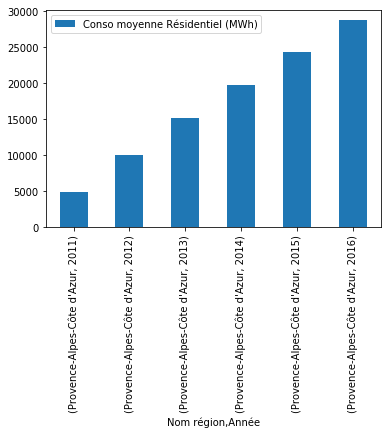

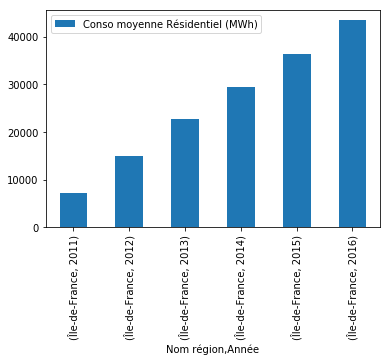

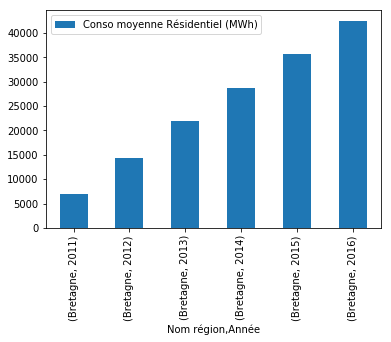

In [28]:
df5 = df5.cumsum()
df5.plot(kind='bar')

df6 = df6.cumsum()
df6.plot(kind='bar')

df7 = df7.cumsum()
df7.plot(kind='bar')
df7

df8= df8.cumsum()
df8.plot(kind='bar')
df8

df9 = df9.cumsum()
df9.plot(kind='bar')
df9

df10 = df10.cumsum()
df10.plot(kind='bar')
df10

df11 = df11.cumsum()
df11.plot(kind='bar')
df11

df12 = df12.cumsum()
df12.plot(kind='bar')
df12

df13 = df13.cumsum()
df13.plot(kind='bar')
df13

df14 = df14.cumsum()
df14.plot(kind='bar')
df14

df15 = df15.cumsum()
df15.plot(kind='bar')
df15

df16 = df16.cumsum()
df16.plot(kind='bar')
df16

In [74]:
df17 = df.groupby(['Nom région','Année']).agg({'Nb sites Industrie' : 'sum','Nb sites Agriculture' : 'sum','Nb sites Tertiaire' : 'sum','Nb sites Secteur non affecté' : 'sum'})
df17 = df17.query('Année == 2016')
df17

,,Nb sites Industrie,Nb sites Agriculture,Nb sites Tertiaire,Nb sites Secteur non affecté
Nom région,Année,,,,
Auvergne-Rhône-Alpes,2016,15418,2021,49089,248
Bourgogne-Franche-Comté,2016,5254,800,15154,82
Bretagne,2016,4631,3135,17238,66
Centre-Val de Loire,2016,3761,4419,14034,105
Grand-Est,2016,6751,1570,20743,81
Hauts-de-France,2016,6560,1628,28054,107
Normandie,2016,4751,906,18093,106
Nouvelle Aquitaine,2016,8702,5127,32298,138
Occitanie,2016,8522,3176,33221,118


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002671160BF60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002671A61A240>], dtype=object)

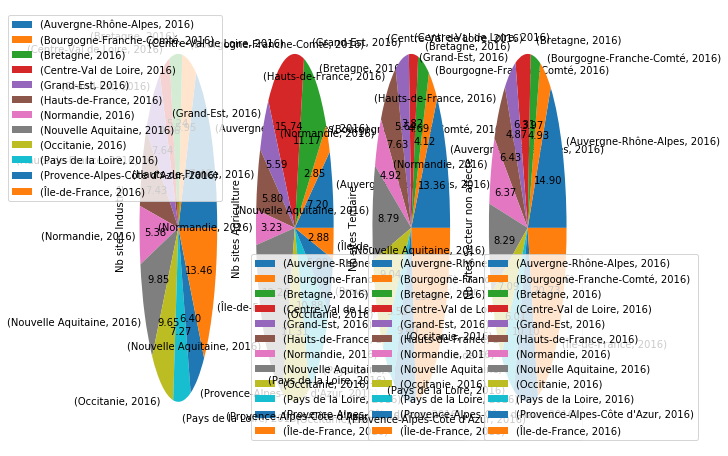

In [77]:
df17.plot.pie(subplots=True,autopct='%.2f',figsize=(8, 8))